In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## CAPSTONE PROJECT Padi-Ku 
Rice Leaf Disease Detection with Transfer Learning using Mobile Net V2 using Keras

In [1]:
# import the libraries as shown below
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
base_dir = "/content/drive/Shareddrives/Machine Learning/rice-leaf-desease (1)"

2.5.0


In [2]:
BATCH_SIZE = 64
IMG_SIZE = (224,224)

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation') # set as validation data


Found 12816 images belonging to 4 classes.
Found 3204 images belonging to 4 classes.


Without Pretrained Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

With Pretrained Model (Transfer Learning)

In [15]:
pretrained_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in pretrained_model.layers:
    layer.trainable = False
next_layer = Flatten()(pretrained_model.output)
next_layer2 = Dropout(0.3)(next_layer)
prediction = Dense(4, activation='softmax')(next_layer2)
model = Model(inputs=pretrained_model.input, outputs=prediction)

In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [5]:
from keras.optimizers import Adam
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [6]:
initial_epochs = 15
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=initial_epochs,
)

Epoch 1/15
201/201 [==============================] - 4477s 22s/step - loss: 0.4445 - accuracy: 0.8350 - val_loss: 0.6933 - val_accuracy: 0.7974
Epoch 2/15
201/201 [==============================] - 156s 776ms/step - loss: 0.1991 - accuracy: 0.9260 - val_loss: 0.7999 - val_accuracy: 0.7850
Epoch 3/15
201/201 [==============================] - 156s 776ms/step - loss: 0.1432 - accuracy: 0.9465 - val_loss: 0.9683 - val_accuracy: 0.8021
Epoch 4/15
201/201 [==============================] - 157s 781ms/step - loss: 0.1168 - accuracy: 0.9579 - val_loss: 0.7974 - val_accuracy: 0.8124
Epoch 5/15
201/201 [==============================] - 155s 774ms/step - loss: 0.1107 - accuracy: 0.9620 - val_loss: 0.8173 - val_accuracy: 0.7949
Epoch 6/15
201/201 [==============================] - 155s 770ms/step - loss: 0.0930 - accuracy: 0.9668 - val_loss: 0.7963 - val_accuracy: 0.8084
Epoch 7/15
201/201 [==============================] - 155s 772ms/step - loss: 0.0910 - accuracy: 0.9678 - val_loss: 1.0052 - 

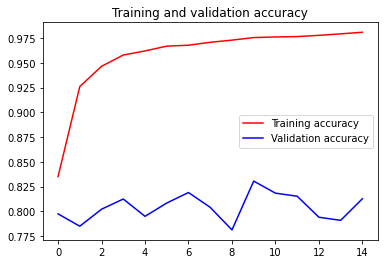

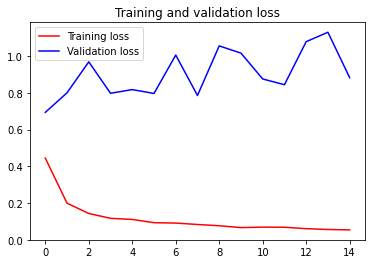

<Figure size 432x288 with 0 Axes>

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [8]:
model.save("padiku_v3.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [27]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving IMG_3233.jpg to IMG_3233.jpg
IMG_3233.jpg
[[2.4808277e-38 9.9999642e-01 0.0000000e+00 3.5648095e-06]]
